In [1]:
import numpy as np
import numpy.matlib as mt
from scipy import signal,stats

from ephysvibe.structures.neuron_data import NeuronData
from ephysvibe.trials import align_trials
from ephysvibe.task import task_constants

import os 
from matplotlib import cm
from matplotlib import pyplot as plt
import glob
import pickle

seed = 2023

In [85]:
def definelatencies(p_values, rt, win, threshold):

   lat=[]
   for i in range(len(p_values)):
      
      tmp=[]
      
      sig=np.zeros(np.array(p_values[i]).shape)
      sig[np.where(np.array(p_values[i])<0.01)[0]]=1
      

      for i_step in np.arange(sig.shape[0]):
         if sig[i_step]==1 and np.sum(sig[i_step:i_step+win])>=threshold:
               tmp.append(i_step)  

      if not tmp:
         lat.append(np.nan)  
      elif tmp[0]>=np.mean(rt[i])+150:
         lat.append(np.nan)
      elif tmp[0]<np.mean(rt[i])+150-50:
         lat.append(tmp[0])  
      
   lat=np.array(lat)

   return lat


In [3]:
with open('C:/Users/ibos.g/Documents/Data/INT-Marseille/OpenEphys/Riesling/averaged_structures/lip_roc_test', 'rb') as handle:
    test_lip = pickle.load(handle)

with open('C:/Users/ibos.g/Documents/Data/INT-Marseille/OpenEphys/Riesling/averaged_structures/pfc_roc_test', 'rb') as handle:
    test_pfc = pickle.load(handle)

with open('C:/Users/ibos.g/Documents/Data/INT-Marseille/OpenEphys/Riesling/averaged_structures/v4_roc_test', 'rb') as handle:
    test_v4 = pickle.load(handle)

In [4]:
with open('C:/Users/ibos.g/Documents/Data/INT-Marseille/OpenEphys/Riesling/averaged_structures/lip_test_avg', 'rb') as handle:
    test_lip_avg = pickle.load(handle)
with open('C:/Users/ibos.g/Documents/Data/INT-Marseille/OpenEphys/Riesling/averaged_structures/pfc_test_avg', 'rb') as handle:
    test_pfc_avg = pickle.load(handle)    
with open('C:/Users/ibos.g/Documents/Data/INT-Marseille/OpenEphys/Riesling/averaged_structures/v4_test_avg', 'rb') as handle:
    test_v4_avg = pickle.load(handle)


In [5]:
lat_lip_orient  =   definelatencies((test_lip['p v in o']), test_lip['reaction times'], win=100, threshold=100)
lat_lip_color   =   definelatencies((test_lip['p v in c']), test_lip['reaction times'], win=100, threshold=100)
lat_lip_match   =   definelatencies((test_lip['p v in m']), test_lip['reaction times'], win=100, threshold=100)

In [86]:
lat_lip_vis_in_1155    =   definelatencies(test_lip['p v vis in 1155'], test_lip['reaction times'],win=75, threshold=75)
lat_lip_vis_in_1551    =   definelatencies(test_lip['p v vis in 1551'], test_lip['reaction times'],win=75, threshold=75)

lat_lip_mat_in_1155    =   definelatencies(test_lip['p v match in 1155'],test_lip['reaction times'], win=75, threshold=75)
lat_lip_mat_in_1551    =   definelatencies(test_lip['p v match in 1551'],test_lip['reaction times'], win=75, threshold=75)


lat_pfc_vis_in_1155    =   definelatencies(test_pfc['p v vis in 1155'], test_pfc['reaction times'], win=75, threshold=75)
lat_pfc_vis_in_1551    =   definelatencies(test_pfc['p v vis in 1551'],  test_pfc['reaction times'],win=75, threshold=75)

lat_pfc_mat_in_1155    =   definelatencies(test_pfc['p v match in 1155'], test_pfc['reaction times'], win=75, threshold=75)
lat_pfc_mat_in_1551    =   definelatencies(test_pfc['p v match in 1551'], test_pfc['reaction times'], win=75, threshold=75)


lat_v4_vis_in_1155    =   definelatencies(test_v4['p v vis in 1155'], test_v4['reaction times'], win=75, threshold=75)
lat_v4_vis_in_1551    =   definelatencies(test_v4['p v vis in 1551'], test_v4['reaction times'], win=75, threshold=75)

lat_v4_mat_in_1155    =   definelatencies(test_v4['p v match in 1155'], test_v4['reaction times'], win=75, threshold=75)
lat_v4_mat_in_1551    =   definelatencies(test_v4['p v match in 1551'], test_v4['reaction times'], win=75, threshold=75)



lat_lip_vis_uot_1155    =   definelatencies(test_lip['p v vis out 1155'], test_lip['reaction times'],win=75, threshold=75)
lat_lip_vis_out_1551    =   definelatencies(test_lip['p v vis out 1551'], test_lip['reaction times'],win=75, threshold=75)

lat_lip_mat_out_1155    =   definelatencies(test_lip['p v match out 1155'],test_lip['reaction times'], win=75, threshold=75)
lat_lip_mat_out_1551    =   definelatencies(test_lip['p v match out 1551'],test_lip['reaction times'], win=75, threshold=75)


lat_pfc_vis_out_1155    =   definelatencies(test_pfc['p v vis out 1155'], test_pfc['reaction times'], win=75, threshold=75)
lat_pfc_vis_out_1551    =   definelatencies(test_pfc['p v vis out 1551'],  test_pfc['reaction times'],win=75, threshold=75)

lat_pfc_mat_out_1155    =   definelatencies(test_pfc['p v match out 1155'], test_pfc['reaction times'], win=75, threshold=75)
lat_pfc_mat_out_1551    =   definelatencies(test_pfc['p v match out 1551'], test_pfc['reaction times'], win=75, threshold=75)


lat_v4_vis_out_1155    =   definelatencies(test_v4['p v vis out 1155'], test_v4['reaction times'], win=75, threshold=75)
lat_v4_vis_out_1551    =   definelatencies(test_v4['p v vis out 1551'], test_v4['reaction times'], win=75, threshold=75)

lat_v4_mat_out_1155    =   definelatencies(test_v4['p v match out 1155'], test_v4['reaction times'], win=75, threshold=75)
lat_v4_mat_out_1551    =   definelatencies(test_v4['p v match out 1551'], test_v4['reaction times'], win=75, threshold=75)

In [42]:
include_lip=[]
# ma  =[]
# za  =[]
rtlip=np.empty(len(test_lip_avg))*np.nan
for i in range(len(test_lip_avg)):
    # ma.append(np.mean(test_lip['averaged data'][i], axis=0)*1000)
    # za.append(np.mean(test_lip['zscored data'][i], axis=0))
    # (np.mean(test_lip['averaged data'][i])*1000)>5 and
    if  (np.mean(test_lip_avg[i])*1000)>5 and test_lip_avg[i].shape[0]>50:
        include_lip.append(i)
        rtlip[i]=np.mean(test_lip['reaction times'][i])

In [132]:
include_lip

[0,
 3,
 10,
 14,
 18,
 19,
 20,
 22,
 25,
 26,
 28,
 34,
 39,
 43,
 45,
 46,
 49,
 50,
 52,
 55,
 57,
 58,
 67,
 70,
 73,
 75,
 76,
 77,
 78,
 79,
 87,
 91,
 92,
 100,
 102,
 106,
 108,
 116,
 121,
 123,
 131,
 133,
 134,
 135,
 136,
 137,
 138,
 140,
 142,
 144,
 145,
 147,
 154,
 159,
 160,
 162,
 163,
 165,
 167,
 168,
 169,
 170,
 172,
 173,
 174,
 178,
 182,
 183,
 187,
 190,
 191,
 194,
 195,
 205,
 207,
 208,
 210,
 227,
 229,
 230,
 231,
 234,
 235,
 242,
 244,
 245,
 249,
 253,
 259,
 261,
 274,
 275,
 277,
 278,
 283,
 284,
 291,
 292,
 293,
 294,
 296,
 297,
 300,
 303,
 304,
 305,
 308,
 312,
 314,
 318,
 319,
 321,
 322,
 323,
 324,
 325,
 327,
 328,
 331,
 333,
 334,
 337,
 342,
 346,
 350,
 351,
 356,
 357,
 359,
 367,
 369,
 370,
 373,
 375,
 376,
 378,
 379,
 381,
 384,
 386,
 387,
 388,
 389,
 390,
 393,
 394,
 398,
 401,
 403,
 405,
 407,
 408,
 409,
 410,
 411,
 413,
 415,
 417,
 418,
 419,
 422,
 426,
 429,
 434,
 439,
 443,
 444,
 448,
 451,
 452,
 453,
 455,
 45

In [64]:
include_lip=[]
rtlip=np.empty(len(test_lip_avg))*np.nan
for i in range(len(test_lip_avg)):
  if  (np.mean(test_lip_avg[i])*1000)>5 and test_lip_avg[i].shape[0]>50:
        include_lip.append(i)
        rtlip[i]=np.mean(test_lip['reaction times'][i])
include_lip=np.array(include_lip)

include_pfc=[]
rtpfc=np.empty(len(test_pfc_avg))*np.nan
for i in range(len(test_pfc_avg)):
   if  (np.mean(test_pfc_avg[i])*1000)>5 and test_pfc_avg[i].shape[0]>50:
        include_pfc.append(i)
        rtpfc[i]=np.mean(test_pfc['reaction times'][i])
include_pfc=np.array(include_pfc)
        
include_v4=[]
rtv4=np.empty(len(test_v4_avg))*np.nan
for i in range(len(test_v4_avg)):
   if  (np.mean(test_v4_avg[i])*1000)>5 and test_v4_avg[i].shape[0]>50:
        include_v4.append(i)
        rtv4[i]=np.mean(test_v4['reaction times'][i])
include_v4=np.array(include_v4)

In [97]:
vis1155=np.reshape(np.concatenate(test_lip['roc v vis in 1155']), [len(test_lip['roc v vis in 1155']), 800])
vis1551=np.reshape(np.concatenate(test_lip['roc v vis in 1551']), [len(test_lip['roc v vis in 1551']), 800])

match1155=np.reshape(np.concatenate(test_lip['roc v match in 1155']), [len(test_lip['roc v match in 1155']), 800])
match1551=np.reshape(np.concatenate(test_lip['roc v match in 1551']), [len(test_lip['roc v match in 1551']), 800])

In [50]:
time_t=np.arange(start=-150, stop=800-150, step=1)
xt_t=[np.where(time_t==0)[0][0],np.where(time_t==225)[0][0], np.where(time_t==450)[0][0]]

In [122]:
plt.scatter(lat_lip_vis_in_1155[np.array(include_lip)[order]], np.arange(order.shape[0]), marker ='o', color=[0, 0, 0], linewidths=0.2,s=0.2)

IndexError: index 503 is out of bounds for axis 0 with size 503

In [127]:
test_lip['roc v vis in 1155']

[0,
 3,
 10,
 14,
 18,
 19,
 20,
 22,
 25,
 26,
 28,
 34,
 39,
 43,
 45,
 46,
 49,
 50,
 52,
 55,
 57,
 58,
 67,
 70,
 73,
 75,
 76,
 77,
 78,
 79,
 87,
 91,
 92,
 100,
 102,
 106,
 108,
 116,
 121,
 123,
 131,
 133,
 134,
 135,
 136,
 137,
 138,
 140,
 142,
 144,
 145,
 147,
 154,
 159,
 160,
 162,
 163,
 165,
 167,
 168,
 169,
 170,
 172,
 173,
 174,
 178,
 182,
 183,
 187,
 190,
 191,
 194,
 195,
 205,
 207,
 208,
 210,
 227,
 229,
 230,
 231,
 234,
 235,
 242,
 244,
 245,
 249,
 253,
 259,
 261,
 274,
 275,
 277,
 278,
 283,
 284,
 291,
 292,
 293,
 294,
 296,
 297,
 300,
 303,
 304,
 305,
 308,
 312,
 314,
 318,
 319,
 321,
 322,
 323,
 324,
 325,
 327,
 328,
 331,
 333,
 334,
 337,
 342,
 346,
 350,
 351,
 356,
 357,
 359,
 367,
 369,
 370,
 373,
 375,
 376,
 378,
 379,
 381,
 384,
 386,
 387,
 388,
 389,
 390,
 393,
 394,
 398,
 401,
 403,
 405,
 407,
 408,
 409,
 410,
 411,
 413,
 415,
 417,
 418,
 419,
 422,
 426,
 429,
 434,
 439,
 443,
 444,
 448,
 451,
 452,
 453,
 455,
 45

IndexError: index 503 is out of bounds for axis 0 with size 503

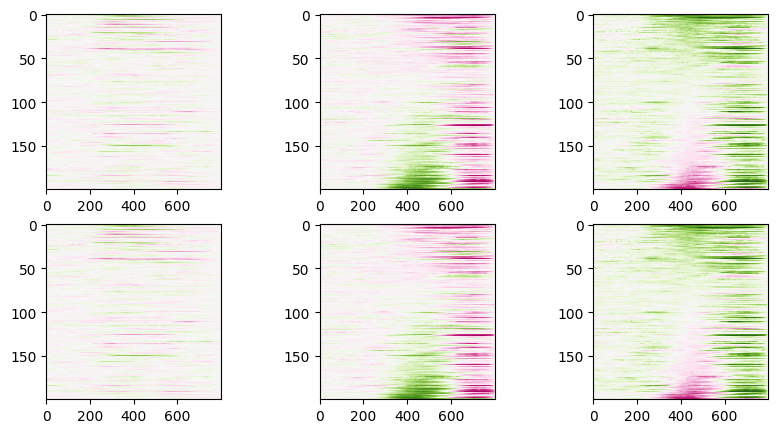

In [120]:
time_t=np.arange(start=-150, stop=800-150, step=1)

fig, ax      =   plt.subplots(2,3,figsize=(10,5))
A=np.abs(test_lip['roc v vis in 1155'][include_lip,:])-(test_lip['roc v match in 1155'][include_lip,:])
order=np.argsort(np.mean(-A[:, 200+150:350+150], axis=1), )

# plt.subplot(2,3,1)
im0       =   ax[0,0].imshow((test_lip['roc v vis in 1155'][np.array(include_lip)[order],:]), vmin=-1, vmax=1,cmap='PiYG', aspect=800/order.shape[0])
# plt.subplot(2,3,2)
im1       =   ax[0,1].imshow((test_lip['roc v match in 1155'][np.array(include_lip)[order],:]), vmin=-1, vmax=1,cmap='PiYG', aspect=800/order.shape[0])
# plt.subplot(2,3,3)
im2       =   ax[0,2].imshow(A[order,:], vmin=-1, vmax=1,cmap='PiYG', aspect=800/order.shape[0])

A=np.abs(test_lip['roc v vis in 1551'][include_lip,:])-(test_lip['roc v match in 1551'][include_lip,:])
order=np.argsort(np.mean(-A[:, 200+150:350+150], axis=1), )
im3       =   ax[1,0].imshow((test_lip['roc v vis in 1551'][np.array(include_lip)[order],:]), vmin=-1, vmax=1,cmap='PiYG', aspect=800/order.shape[0])
im4       =   ax[1,1].imshow((test_lip['roc v match in 1551'][np.array(include_lip)[order],:]), vmin=-1, vmax=1,cmap='PiYG', aspect=800/order.shape[0])
im5       =   ax[1,2].imshow(A[order,:], vmin=-1, vmax=1,cmap='PiYG', aspect=800/order.shape[0])

ax[0,0].scatter(lat_lip_vis_in_1155[np.array(include_lip)[order]], np.arange(order.shape[0]), marker ='o', color=[0, 0, 0], linewidths=0.2,s=0.2)
ax[0,1].scatter(lat_lip_mat_in_1155[np.array(include_lip)[order]], np.arange(order.shape[0]), marker ='o', color=[0, 0, 0], linewidths=0.2,s=0.2)
ax[1,0].scatter(lat_lip_vis_in_1551[np.array(include_lip)[order]], np.arange(order.shape[0]), marker ='o', color=[0, 0, 0], linewidths=0.2,s=0.2)
ax[1,1].scatter(lat_lip_mat_in_1551[np.array(include_lip)[order]], np.arange(order.shape[0]), marker ='o', color=[0, 0, 0], linewidths=0.2,s=0.2)


ax[0,2].scatter(rtlip[order]+150, np.arange(order.shape[0]), marker ='o', color=[0, 0, 0], linewidths=0.2,s=0.2)
ax[1,2].scatter(rtlip[order]+150, np.arange(order.shape[0]), marker ='o', color=[0, 0, 0], linewidths=0.2,s=0.2)

ax[0,0].set_xticks(xt_t)
ax[0,1].set_xticks(xt_t)
ax[0,2].set_xticks(xt_t)
ax[1,0].set_xticks(xt_t)
ax[1,1].set_xticks(xt_t)
ax[1,2].set_xticks(xt_t)

ax[0,0].set_xticklabels(time_t[xt_t].astype(str))
ax[0,1].set_xticklabels(time_t[xt_t].astype(str))
ax[0,2].set_xticklabels(time_t[xt_t].astype(str))
ax[1,0].set_xticklabels(time_t[xt_t].astype(str))
ax[1,1].set_xticklabels(time_t[xt_t].astype(str))
ax[1,2].set_xticklabels(time_t[xt_t].astype(str))


fig.colorbar(im2)

fig.colorbar(im5)


In [76]:
800/order.shape[0]

0.47875523638539796

IndexError: index 2079 is out of bounds for axis 0 with size 2058

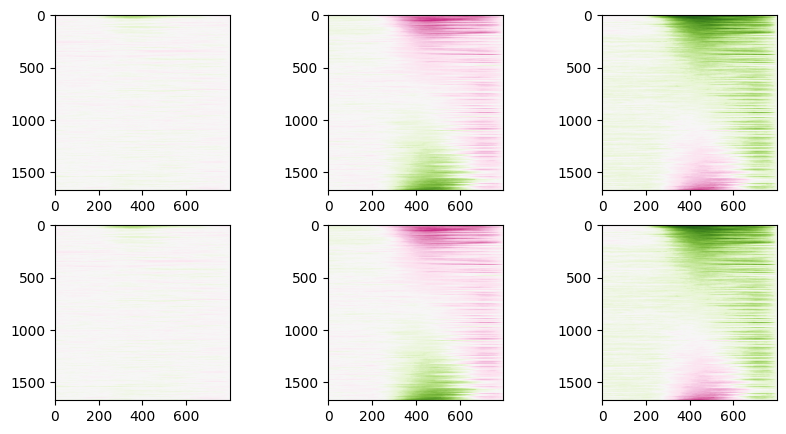

In [117]:
time_t=np.arange(start=-150, stop=800-150, step=1)

fig, ax      =   plt.subplots(2,3,figsize=(10,5))
A=np.abs(test_pfc['roc v vis in 1155'][include_pfc,:])-(test_pfc['roc v match in 1155'][include_pfc,:])
order=np.argsort(np.mean(-A[:, 200+150:350+150], axis=1), )

# plt.subplot(2,3,1)
im0       =   ax[0,0].imshow((test_pfc['roc v vis in 1155'][np.array(include_pfc)[order],:]), vmin=-1, vmax=1,cmap='PiYG', aspect=800/order.shape[0])
# plt.subplot(2,3,2)
im1       =   ax[0,1].imshow((test_pfc['roc v match in 1155'][np.array(include_pfc)[order],:]), vmin=-1, vmax=1,cmap='PiYG', aspect=800/order.shape[0])
# plt.subplot(2,3,3)
im2       =   ax[0,2].imshow(A[order,:], vmin=-1, vmax=1,cmap='PiYG', aspect=800/order.shape[0])

A=np.abs(test_pfc['roc v vis in 1551'][include_pfc,:])-(test_pfc['roc v match in 1551'][include_pfc,:])
order=np.argsort(np.mean(-A[:, 200+150:350+150], axis=1), )
im3       =   ax[1,0].imshow((test_pfc['roc v vis in 1551'][np.array(include_pfc)[order],:]), vmin=-1, vmax=1,cmap='PiYG', aspect=800/order.shape[0])
im4       =   ax[1,1].imshow((test_pfc['roc v match in 1551'][np.array(include_pfc)[order],:]), vmin=-1, vmax=1,cmap='PiYG', aspect=800/order.shape[0])
im5       =   ax[1,2].imshow(A[order,:], vmin=-1, vmax=1,cmap='PiYG', aspect=800/order.shape[0])

ax[0,0].scatter(lat_pfc_vis_in_1155[np.array(include_pfc)[order]], np.arange(order.shape[0]), marker ='o', color=[0, 0, 0], linewidths=0.2,s=0.2)
ax[0,1].scatter(lat_pfc_mat_in_1155[np.array(include_pfc)[order]], np.arange(order.shape[0]), marker ='o', color=[0, 0, 0], linewidths=0.2,s=0.2)
ax[1,0].scatter(lat_pfc_vis_in_1551[np.array(include_pfc)[order]], np.arange(order.shape[0]), marker ='o', color=[0, 0, 0], linewidths=0.2,s=0.2)
ax[1,1].scatter(lat_pfc_mat_in_1551[np.array(include_pfc)[order]], np.arange(order.shape[0]), marker ='o', color=[0, 0, 0], linewidths=0.2,s=0.2)


ax[0,2].scatter(rtpfc[order]+150, np.arange(order.shape[0]), marker ='o', color=[0, 0, 0], linewidths=0.2,s=0.2)
ax[1,2].scatter(rtpfc[order]+150, np.arange(order.shape[0]), marker ='o', color=[0, 0, 0], linewidths=0.2,s=0.2)

ax[0,0].set_xticks(xt_t)
ax[0,1].set_xticks(xt_t)
ax[0,2].set_xticks(xt_t)
ax[1,0].set_xticks(xt_t)
ax[1,1].set_xticks(xt_t)
ax[1,2].set_xticks(xt_t)

ax[0,0].set_xticklabels(time_t[xt_t].astype(str))
ax[0,1].set_xticklabels(time_t[xt_t].astype(str))
ax[0,2].set_xticklabels(time_t[xt_t].astype(str))
ax[1,0].set_xticklabels(time_t[xt_t].astype(str))
ax[1,1].set_xticklabels(time_t[xt_t].astype(str))
ax[1,2].set_xticklabels(time_t[xt_t].astype(str))


fig.colorbar(im2)

fig.colorbar(im5)


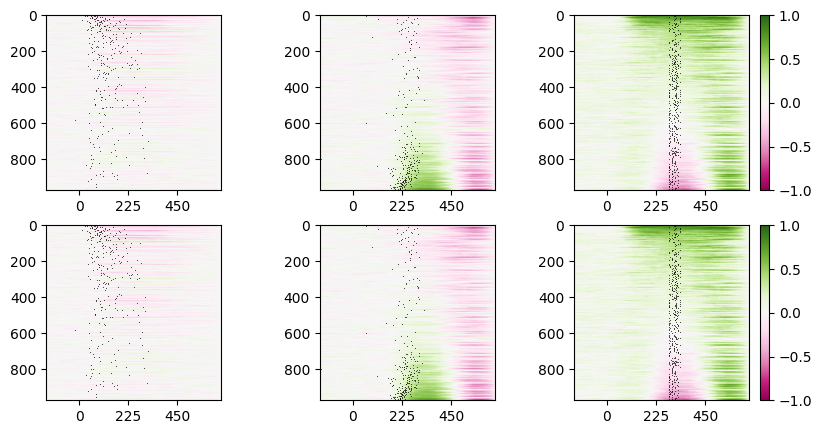

In [84]:
time_t=np.arange(start=-150, stop=800-150, step=1)

fig, ax      =   plt.subplots(2,3,figsize=(10,5))
A=np.abs(test_v4['roc v vis in 1155'][include_v4,:])-(test_v4['roc v match in 1155'][include_v4,:])
order=np.argsort(np.mean(-A[:, 200+150:350+150], axis=1), )

# plt.subplot(2,3,1)
im0       =   ax[0,0].imshow((test_v4['roc v vis in 1155'][np.array(include_v4)[order],:]), vmin=-1, vmax=1,cmap='PiYG', aspect=800/order.shape[0])
# plt.subplot(2,3,2)
im1       =   ax[0,1].imshow((test_v4['roc v match in 1155'][np.array(include_v4)[order],:]), vmin=-1, vmax=1,cmap='PiYG', aspect=800/order.shape[0])
# plt.subplot(2,3,3)
im2       =   ax[0,2].imshow(A[order,:], vmin=-1, vmax=1,cmap='PiYG', aspect=800/order.shape[0])

A=np.abs(test_v4['roc v vis in 1551'][include_v4,:])-(test_v4['roc v match in 1551'][include_v4,:])
order=np.argsort(np.mean(-A[:, 200+150:350+150], axis=1), )
im3       =   ax[1,0].imshow((test_v4['roc v vis in 1551'][np.array(include_v4)[order],:]), vmin=-1, vmax=1,cmap='PiYG', aspect=800/order.shape[0])
im4       =   ax[1,1].imshow((test_v4['roc v match in 1551'][np.array(include_v4)[order],:]), vmin=-1, vmax=1,cmap='PiYG', aspect=800/order.shape[0])
im5       =   ax[1,2].imshow(A[order,:], vmin=-1, vmax=1,cmap='PiYG', aspect=800/order.shape[0])

ax[0,0].scatter(lat_v4_vis_in_1155[np.array(include_v4)[order]], np.arange(order.shape[0]), marker ='o', color=[0, 0, 0], linewidths=0.2,s=0.2)
ax[0,1].scatter(lat_v4_mat_in_1155[np.array(include_v4)[order]], np.arange(order.shape[0]), marker ='o', color=[0, 0, 0], linewidths=0.2,s=0.2)
ax[1,0].scatter(lat_v4_vis_in_1551[np.array(include_v4)[order]], np.arange(order.shape[0]), marker ='o', color=[0, 0, 0], linewidths=0.2,s=0.2)
ax[1,1].scatter(lat_v4_mat_in_1551[np.array(include_v4)[order]], np.arange(order.shape[0]), marker ='o', color=[0, 0, 0], linewidths=0.2,s=0.2)


ax[0,2].scatter(rtv4[order]+150, np.arange(order.shape[0]), marker ='o', color=[0, 0, 0], linewidths=0.2,s=0.2)
ax[1,2].scatter(rtv4[order]+150, np.arange(order.shape[0]), marker ='o', color=[0, 0, 0], linewidths=0.2,s=0.2)

ax[0,0].set_xticks(xt_t)
ax[0,1].set_xticks(xt_t)
ax[0,2].set_xticks(xt_t)
ax[1,0].set_xticks(xt_t)
ax[1,1].set_xticks(xt_t)
ax[1,2].set_xticks(xt_t)

ax[0,0].set_xticklabels(time_t[xt_t].astype(str))
ax[0,1].set_xticklabels(time_t[xt_t].astype(str))
ax[0,2].set_xticklabels(time_t[xt_t].astype(str))
ax[1,0].set_xticklabels(time_t[xt_t].astype(str))
ax[1,1].set_xticklabels(time_t[xt_t].astype(str))
ax[1,2].set_xticklabels(time_t[xt_t].astype(str))


fig.colorbar(im2)

fig.colorbar(im5)


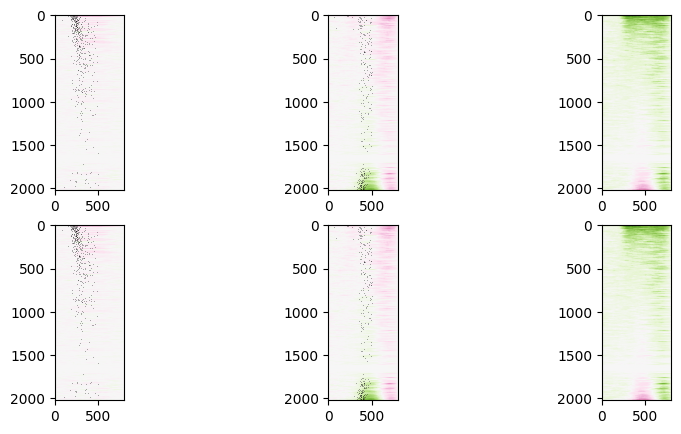

In [18]:

fig, ax      =   plt.subplots(2,3,figsize=(10,5))
A=np.abs(test_v4['roc values vis 1155'])-test_v4['roc values match 1155']
order=np.argsort(np.mean(-A[:, 200:500], axis=1), )

# plt.subplot(2,3,1)
im0       =   ax[0,0].imshow((test_v4['roc values vis 1155'][order,:]), vmin=-1, vmax=1,cmap='PiYG')
# plt.subplot(2,3,2)
im1       =   ax[0,1].imshow((test_v4['roc values match 1155'][order,:]), vmin=-1, vmax=1,cmap='PiYG')
# plt.subplot(2,3,3)
im2       =   ax[0,2].imshow(A[order,:], vmin=-1, vmax=1,cmap='PiYG')

A=np.abs(test_v4['roc values vis 1551'])-test_v4['roc values match 1551']
order=np.argsort(np.mean(-A[:, 200:500], axis=1), )
im3       =   ax[1,0].imshow((test_v4['roc values vis 1551'][order,:]), vmin=-1, vmax=1,cmap='PiYG')
im4       =   ax[1,1].imshow((test_v4['roc values match 1551'][order,:]), vmin=-1, vmax=1,cmap='PiYG')
im5       =   ax[1,2].imshow(A[order,:], vmin=-1, vmax=1,cmap='PiYG')

ax[0,0].scatter(lat_v4_vis_1155[order], np.arange(order.shape[0]), marker ='o', color=[0, 0, 0], linewidths=0.1,s=0.1)
ax[0,1].scatter(lat_v4_mat_1155[order], np.arange(order.shape[0]), marker ='o', color=[0, 0, 0], linewidths=0.1,s=0.1)
ax[1,0].scatter(lat_v4_vis_1551[order], np.arange(order.shape[0]), marker ='o', color=[0, 0, 0], linewidths=0.1,s=0.1)
ax[1,1].scatter(lat_v4_mat_1551[order], np.arange(order.shape[0]), marker ='o', color=[0, 0, 0], linewidths=0.1,s=0.1)

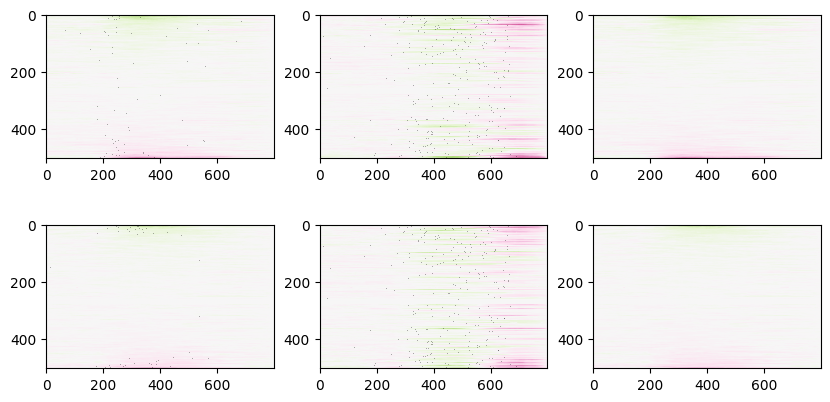

In [16]:
fig, ax      =   plt.subplots(2,3,figsize=(10,5))
A=(test_lip['roc values o'][include_lip,:])#-(test_lip['roc values m'][include_lip,:])
order=np.argsort(np.mean(-A[:, 200:500], axis=1), )

# plt.subplot(2,3,1)
im0       =   ax[0,0].imshow((test_lip['roc values o'][np.array(include_lip)[order],:]), vmin=-1, vmax=1,cmap='PiYG')
# plt.subplot(2,3,2)
im1       =   ax[0,1].imshow((test_lip['roc values m'][np.array(include_lip)[order],:]), vmin=-1, vmax=1,cmap='PiYG')
# plt.subplot(2,3,3)
im2       =   ax[0,2].imshow(A[order,:], vmin=-1, vmax=1,cmap='PiYG')

A=(test_lip['roc values c'][include_lip,:])#-test_lip['roc values m'][include_lip,:]
order=np.argsort(np.mean(-A[:, 200:500], axis=1), )
im3       =   ax[1,0].imshow((test_lip['roc values c'][np.array(include_lip)[order],:]), vmin=-1, vmax=1,cmap='PiYG')
im4       =   ax[1,1].imshow((test_lip['roc values m'][np.array(include_lip)[order],:]), vmin=-1, vmax=1,cmap='PiYG')
im5       =   ax[1,2].imshow(A[order,:], vmin=-1, vmax=1,cmap='PiYG')

ax[0,0].scatter(lat_lip_orient[np.array(include_lip)[order]], np.arange(order.shape[0]), marker ='o', color=[0, 0, 0], linewidths=0.1,s=0.1)
ax[0,1].scatter(lat_lip_match[np.array(include_lip)[order]], np.arange(order.shape[0]), marker ='o', color=[0, 0, 0], linewidths=0.1,s=0.1)
ax[1,0].scatter(lat_lip_color[np.array(include_lip)[order]], np.arange(order.shape[0]), marker ='o', color=[0, 0, 0], linewidths=0.1,s=0.1)
ax[1,1].scatter(lat_lip_match[np.array(include_lip)[order]], np.arange(order.shape[0]), marker ='o', color=[0, 0, 0], linewidths=0.1,s=0.1)

In [58]:
lo=lat_lip_orient[np.array(include_lip)]
lo[lo>0]
np.mean(lo[lo>0])

306.6865671641791

In [61]:
lm=lat_lip_match[np.array(include_lip)]
lm[lm>0]
np.mean(lm[lm>0])

462.61752988047806

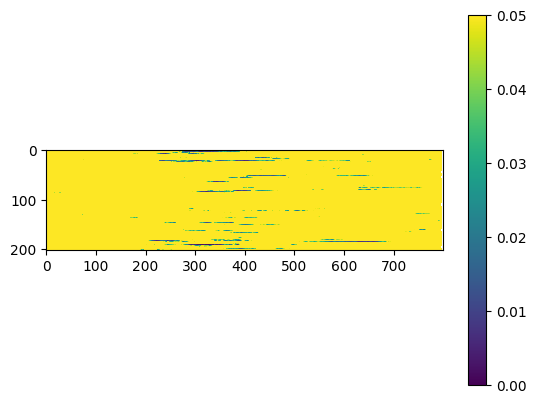

In [149]:
plt.imshow(test_lip['p values o'][np.array(include_lip)[order],:], vmin=0, vmax=0.05)
plt.colorbar()